In [1]:
#一、Model 基础验证法 


from sklearn.datasets import load_iris # iris数据集
from sklearn.model_selection import train_test_split # 分割数据模块
from sklearn.neighbors import KNeighborsClassifier # K最近邻(kNN，k-NearestNeighbor)分类算法

#1.1加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target

#1.2分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

#1.3建立模型
knn = KNeighborsClassifier()

#1.4训练模型
knn.fit(X_train, y_train)

#1.5将准确率打印出
print(knn.score(X_test, y_test))

# 0.973684210526
# 可以看到基础验证的准确率为0.973684210526

0.9736842105263158


In [7]:
#二、Model 交叉验证法(Cross Validation) 


# K折交叉验证模块
from sklearn.model_selection import cross_val_score

#使用K折交叉验证模块
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

#将5次的预测准确率打印出
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]

#将5次的预测准确平均率打印出
print(scores.mean())
# # 0.973333333333
# 可以看到交叉验证的准确平均率为0.973333333333

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


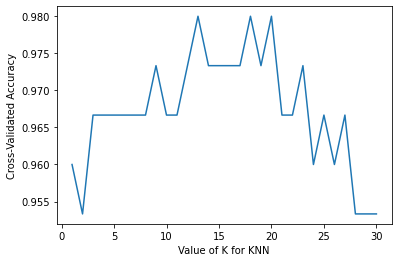

In [8]:
# 三、以准确率(accuracy)判断 

# 一般来说准确率(accuracy)会用于判断分类(Classification)模型的好坏。

import matplotlib.pyplot as plt #可视化模块

#建立测试参数集
k_range = range(1, 31)

k_scores = []

#藉由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

#可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
#从图中可以得知，选择12~18的k值最好。高过18之后，准确率开始下降则是因为过拟合(Over fitting)的问题。

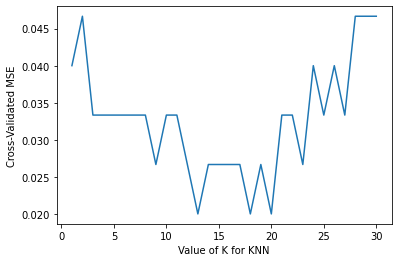

In [14]:
# 四、以平均方差(Mean squared error) 
# 一般来说平均方差(Mean squared error)会用于判断回归(Regression)模型的好坏。

import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(loss.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [15]:





#交叉验证2

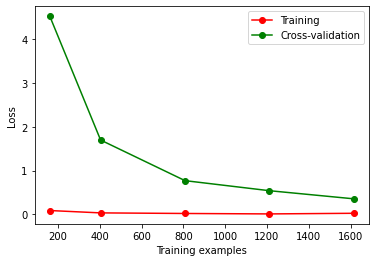

In [18]:
# sklearn.learning_curve 中的 learning curve 可以很直观的看出我们的 model 学习的进度, 
#对比发现有没有 overfitting 的问题. 然后我们可以对我们的 model 进行调整, 克服 overfitting 的问题.

# Learning curve 检视过拟合 




# 1.加载对应模块:

from sklearn.model_selection import learning_curve #学习曲线模块
from sklearn.datasets import load_digits #digits数据集
from sklearn.svm import SVC #Support Vector Classifier
import matplotlib.pyplot as plt #可视化模块
import numpy as np



# 2.加载digits数据集，其包含的是手写体的数字，从0到9。数据集总共有1797个样本，
# 每个样本由64个特征组成， 分别为其手写体对应的8×8像素表示，每个特征取值0~16。

digits = load_digits()
X = digits.data
y = digits.target



# 3.观察样本由小到大的学习曲线变化, 采用K折交叉验证 cv=10, 选择平均方差检视模型效能 scoring='neg_mean_squared_error',
# 样本由小到大分成5轮检视学习曲线(10%, 25%, 50%, 75%, 100%):

train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error',
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])



#4.平均每一轮所得到的平均方差(共5轮，分别为样本10%、25%、50%、75%、100%)

train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)



#5.可视化图形:

plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

In [19]:
##############################


#3.交叉验证

# 连续三节的交叉验证(cross validation)让我们知道在机器学习中验证是有多么的重要, 
# 这一次的 sklearn 中我们用到了sklearn.learning_curve当中的另外一种, 
#叫做validation_curve,
# 用这一种曲线我们就能更加直观看出改变模型中的参数的时候有没有过拟合(overfitting)的问题了.
# 这也是可以让我们更好的选择参数的方法.





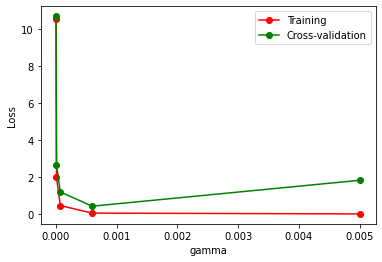

In [23]:
# validation_curve 检视过拟合 
# 继续上一节的例子，并稍作小修改即可画出图形。
# 这次我们来验证SVC中的一个参数 gamma 在什么范围内能使 model 产生好的结果. 以及过拟合和 gamma 取值的关系.

from sklearn.model_selection import learning_curve #学习曲线模块
from sklearn.datasets import load_digits 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import numpy as np

#1.digits数据集
digits = load_digits()
X = digits.data
y = digits.target

#2.建立参数测试集
param_range = np.logspace(-6, -2.3, 5)

#3.使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='neg_mean_squared_error')

#4.平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

#5.可视化图形
plt.plot(param_range, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()